In [2]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
# # API URL
# url = "https://data.cityofchicago.org/resource/ijzp-q8t2.json"

# params = {
#     "$where": "date between '2021-05-01T00:00:00' and '2022-12-31T23:59:59'",
#     "$limit": 387000  # real number of data is 387321
# }

# response = requests.get(url, params=params)

# if response.status_code == 200:
#     data = response.json()
#     df = pd.DataFrame(data)
#     print(df.shape)
#     print(df.head())
#     print("============================================")
#     print(df.tail())
# else:
#     print("Request Failed! Erroe Code:", response.status_code)

(387000, 22)
         id case_number                     date                     block  \
0  13204430    JG392776  2021-05-01T00:00:00.000     068XX S HERMITAGE AVE   
1  13274257    JG500682  2021-05-01T00:00:00.000      051XX W DIVERSEY AVE   
2  13721153    JJ115857  2021-05-01T00:00:00.000  048XX S CHICAGO BEACH DR   
3  13399462    JH188639  2021-05-01T00:00:00.000         121XX S LAFLIN ST   
4  13184660    JG393128  2021-05-01T00:00:00.000       028XX S HARDING AVE   

   iucr                primary_type                               description  \
0  1055           HUMAN TRAFFICKING                     INVOLUNTARY SERVITUDE   
1  0281     CRIMINAL SEXUAL ASSAULT                            NON-AGGRAVATED   
2  1153          DECEPTIVE PRACTICE       FINANCIAL IDENTITY THEFT OVER $ 300   
3  1753  OFFENSE INVOLVING CHILDREN  SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER   
4  1562                 SEX OFFENSE          AGGRAVATED CRIMINAL SEXUAL ABUSE   

  location_description  arrest 

In [3]:
data_url = 'https://data.cityofchicago.org/resource/ijzp-q8t2.csv?$limit=1100000'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(data_url)

# Display the first few rows of the DataFrame
print(len(df))

1100000


In [4]:
# Assuming df is already defined in your notebook
df.to_csv('covid_data_output.csv', index=False)

In [5]:
df.head(5)

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,13777896,JJ183487,2025-03-16T03:00:00.000,040XX N KEYSTONE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,39.0,16.0,08B,1148566.0,1926623.0,2025,2025-03-19T15:41:08.000,41.954594,-87.729245,"\n, \n(41.954593897, -87.729244692)"
1,13776543,JJ182816,2025-03-12T00:00:00.000,037XX W NORTH AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,26.0,23.0,07,1151340.0,1910377.0,2025,2025-03-19T15:42:01.000,41.909959,-87.719475,"\n, \n(41.909959416, -87.719474573)"
2,13772937,JJ178623,2025-03-12T00:00:00.000,076XX S EAST END AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,43.0,11,1188860.0,1854711.0,2025,2025-03-19T15:42:01.000,41.756389,-87.583428,"\n, \n(41.756389436, -87.583428355)"
3,13774108,JJ179898,2025-03-12T00:00:00.000,097XX S MERRILL AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,7.0,51.0,07,1192381.0,1840724.0,2025,2025-03-19T15:42:01.000,41.717923,-87.570979,"\n, \n(41.717922891, -87.570978883)"
4,13772980,JJ178262,2025-03-12T00:00:00.000,095XX S HALSTED ST,0560,ASSAULT,SIMPLE,LIBRARY,False,False,...,21.0,73.0,08A,1172656.0,1841600.0,2025,2025-03-19T15:42:01.000,41.720783,-87.643198,"\n, \n(41.720783347, -87.643197739)"


In [6]:
df.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [7]:
crime_types = df[['primary_type']]

# total number of each type of crime
crime_type_total = crime_types.groupby('primary_type').size()

# for each type of crime, count the number of arrests and domestic violence
crime_type_counts = df.groupby('primary_type').agg({
    'arrest': 'sum',
    'domestic': 'sum'
})

# add total number of each type of crime
crime_type_counts['Total'] = crime_type_total

# sort by total number in descending order
crime_type_counts = crime_type_counts.sort_values(by='Total', ascending=False)
print(crime_type_counts)

                                   arrest  domestic   Total
primary_type                                               
THEFT                               12405     12500  239779
BATTERY                             30387    107753  195404
CRIMINAL DAMAGE                      4419     18989  125194
ASSAULT                              9951     29108   98456
MOTOR VEHICLE THEFT                  2651      1430   90700
DECEPTIVE PRACTICE                   1980      1234   79701
OTHER OFFENSE                       10763     27094   69671
ROBBERY                              2677       979   41799
WEAPONS VIOLATION                   24234       243   39431
BURGLARY                             1769      1407   34996
NARCOTICS                           25563        59   26169
CRIMINAL TRESPASS                    5867      1744   19828
OFFENSE INVOLVING CHILDREN            752      6579    8263
CRIMINAL SEXUAL ASSAULT               347      1557    7106
SEX OFFENSE                           44

/var/folders/gv/4cnh8blj2mgcj1tbxqms_3yw0000gn/T/ipykernel_21279/71805223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_type_counts['Total'], y=crime_type_counts.index, palette='viridis')


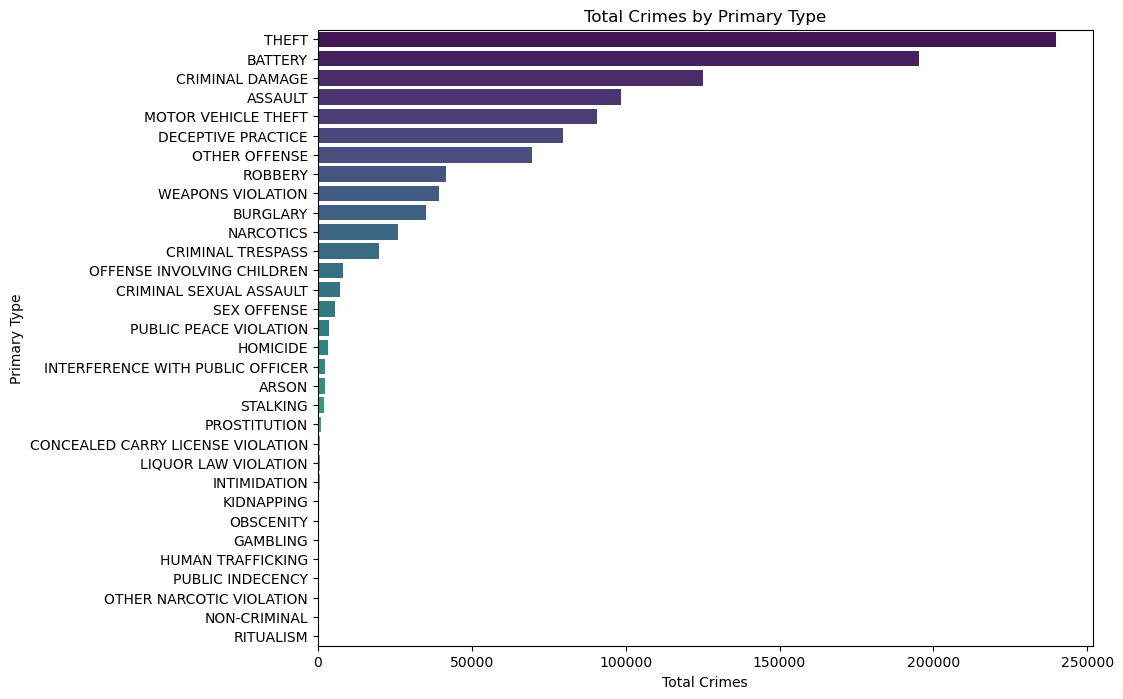

In [8]:
plt.figure(figsize=(10, 8))
sns.barplot(x=crime_type_counts['Total'], y=crime_type_counts.index, palette='viridis')
plt.xlabel('Total Crimes')
plt.ylabel('Primary Type')
plt.title('Total Crimes by Primary Type')
plt.show()

                     arrest  domestic   Total
primary_type                                 
THEFT                 12405     12500  239779
BATTERY               30387    107753  195404
CRIMINAL DAMAGE        4419     18989  125194
ASSAULT                9951     29108   98456
MOTOR VEHICLE THEFT    2651      1430   90700
DECEPTIVE PRACTICE     1980      1234   79701
OTHER OFFENSE         10763     27094   69671
ROBBERY                2677       979   41799
WEAPONS VIOLATION     24234       243   39431
BURGLARY               1769      1407   34996
NARCOTICS             25563        59   26169
CRIMINAL TRESPASS      5867      1744   19828


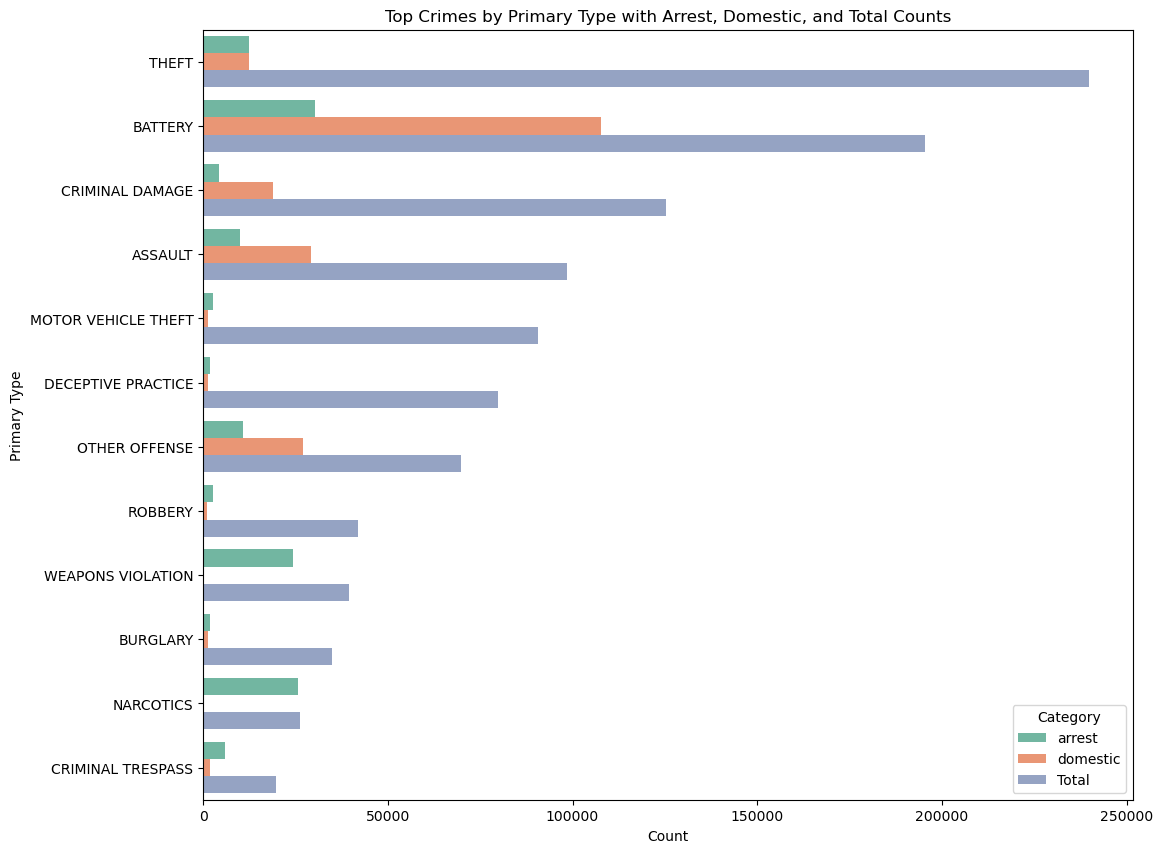

In [9]:
# choose top crimes with total number > 18000
top_crimes = crime_type_counts[crime_type_counts['Total'] > 18000]
print(top_crimes)

top_crimes = top_crimes.reset_index()
top_crimes_melted = top_crimes.melt(id_vars='primary_type', value_vars=['arrest', 'domestic', 'Total'], 
                                    var_name='Category', value_name='Count')

plt.figure(figsize=(12, 10))
sns.barplot(x='Count', y='primary_type', hue='Category', data=top_crimes_melted, palette='Set2')

plt.xlabel('Count')
plt.ylabel('Primary Type')
plt.title('Top Crimes by Primary Type with Arrest, Domestic, and Total Counts')
plt.legend(title='Category')
plt.show()

            Total  Domestic  Arrest
date                               
2020-07-31    205        50      31
2020-08-31  19937      4392    3015
2020-09-30  17969      3872    2732
2020-10-31  18464      3726    2607
2020-11-30  16668      3584    2425
2020-12-31  16541      3467    2321
2021-01-31  16277      3686    2315
2021-02-28  13144      3050    2067
2021-03-31  16190      3886    2632
2021-04-30  15677      4008    2245
2021-05-31  17867      4536    2601
2021-06-30  18873      4521    2444
2021-07-31  19288      4412    2318
2021-08-31  18616      4324    2039
2021-09-30  19282      4136    2099
2021-10-31  19400      3929    1998
2021-11-30  17472      3619    1988
2021-12-31  17367      3768    1861
2022-01-31  15716      3376    1809
2022-02-28  15276      3134    2164
2022-03-31  18429      3739    2343
2022-04-30  18048      3827    2455
2022-05-31  20201      4163    2882
2022-06-30  20843      4171    2599
2022-07-31  22333      4156    2476
2022-08-31  22370      4076 

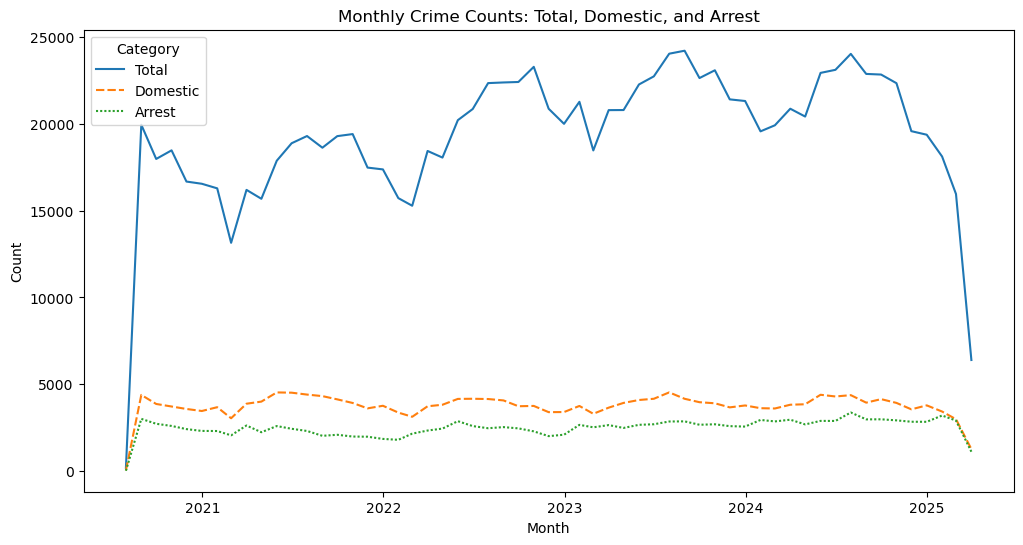

In [10]:
# Transform the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# sum the number of crimes for each month
monthly_crime_counts = df.resample('M', on='date').size()

# calculate the number of domestic and arrest crimes for each month
monthly_domestic_counts = df.resample('M', on='date')['domestic'].sum()
monthly_arrest_counts = df.resample('M', on='date')['arrest'].sum()

monthly_counts = pd.DataFrame({
    'Total': monthly_crime_counts,
    'Domestic': monthly_domestic_counts,
    'Arrest': monthly_arrest_counts
})

print(monthly_counts)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Crime Counts: Total, Domestic, and Arrest')
plt.legend(title='Category')
plt.show()

primary_type  ASSAULT  BATTERY  BURGLARY  CRIMINAL DAMAGE  CRIMINAL TRESPASS  \
date                                                                           
2020-07-31         11       46         4               26                  4   
2020-08-31       1836     4076      1062             2366                342   
2020-09-30       1699     3446       615             2169                374   
2020-10-31       1512     3415       643             2144                315   
2020-11-30       1336     3019       619             1888                271   
2020-12-31       1275     2729       549             1670                265   
2021-01-31       1339     2779       486             1727                254   
2021-02-28       1284     2438       351             1457                214   
2021-03-31       1451     3102       394             1896                279   
2021-04-30       1601     3078       416             1948                271   
2021-05-31       1800     3678       472

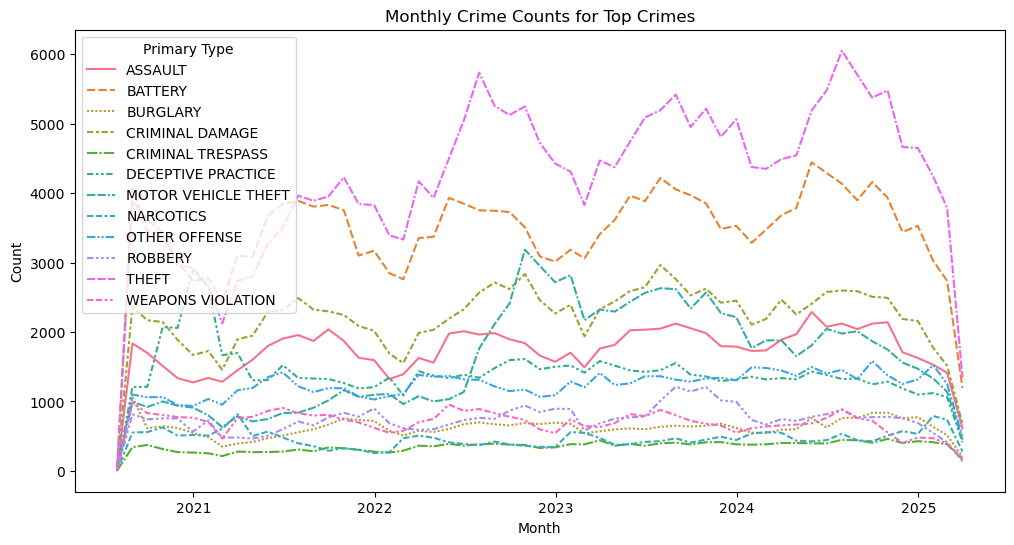

In [11]:
top_crimes_data = df[df['primary_type'].isin(top_crimes['primary_type'].tolist())]
# print(top_crimes_data.shape)
# print(top_crimes)
# group by month and primary type
monthly_crime_counts = top_crimes_data.groupby([pd.Grouper(key='date', freq='M'), 'primary_type']).size().unstack(fill_value=0)

# top crime in each month
print(monthly_crime_counts)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_crime_counts)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Crime Counts for Top Crimes')
plt.legend(title='Primary Type')
plt.show()

primary_type  ARSON  BURGLARY  MOTOR VEHICLE THEFT  THEFT
date                                                     
2020-07-31        0         4                   13     34
2020-08-31       57      1062                  996   3886
2020-09-30       56       615                  921   3622
2020-10-31       54       643                 1000   3430
2020-11-30       49       619                  939   2968
2020-12-31       40       549                  912   2924
2021-01-31       39       486                  801   2669
2021-02-28       23       351                  630   2125
2021-03-31       49       394                  787   2740
2021-04-30       41       416                  713   2801
2021-05-31       49       472                  748   3272
2021-06-30       50       509                  834   3504
2021-07-31       51       556                  838   3965
2021-08-31       48       600                  911   3890
2021-09-30       46       668                 1016   3952
2021-10-31    

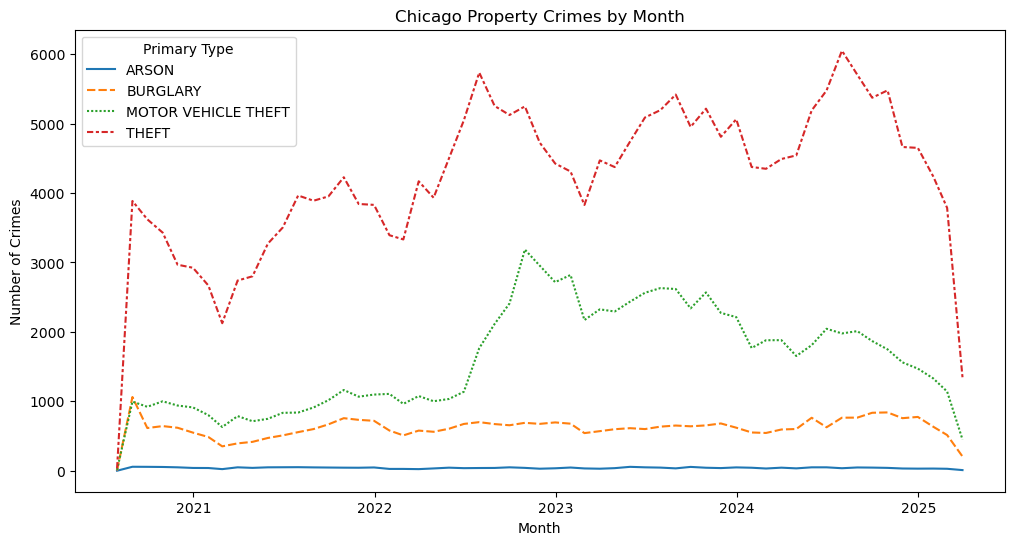

In [12]:
# Classify ARSON, BURGLARY, MOTOR VEHICLE THEFT, THEFT as 'property crimes'
property_crimes = df[df['primary_type'].isin(['ARSON', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'THEFT'])]

# calcaulte the number of property crimes for each month
monthly_property_crime_counts = property_crimes.groupby([pd.Grouper(key='date', freq='M'), 'primary_type']).size().unstack(fill_value=0)

print(monthly_property_crime_counts)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_property_crime_counts)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Chicago Property Crimes by Month')
plt.legend(title='Primary Type')
plt.show()

primary_type  CRIMINAL DAMAGE  NARCOTICS  PROSTITUTION
date                                                  
2020-07-31                 26          3             0
2020-08-31               2366        552             9
2020-09-30               2169        560            48
2020-10-31               2144        626             4
2020-11-30               1888        509             4
2020-12-31               1670        517             4
2021-01-31               1727        509             4
2021-02-28               1457        608             7
2021-03-31               1896        816             6
2021-04-30               1948        502             0
2021-05-31               2288        568            11
2021-06-30               2317        481             9
2021-07-31               2490        399            12
2021-08-31               2323        357             1
2021-09-30               2298        291            22
2021-10-31               2246        326             0
2021-11-30

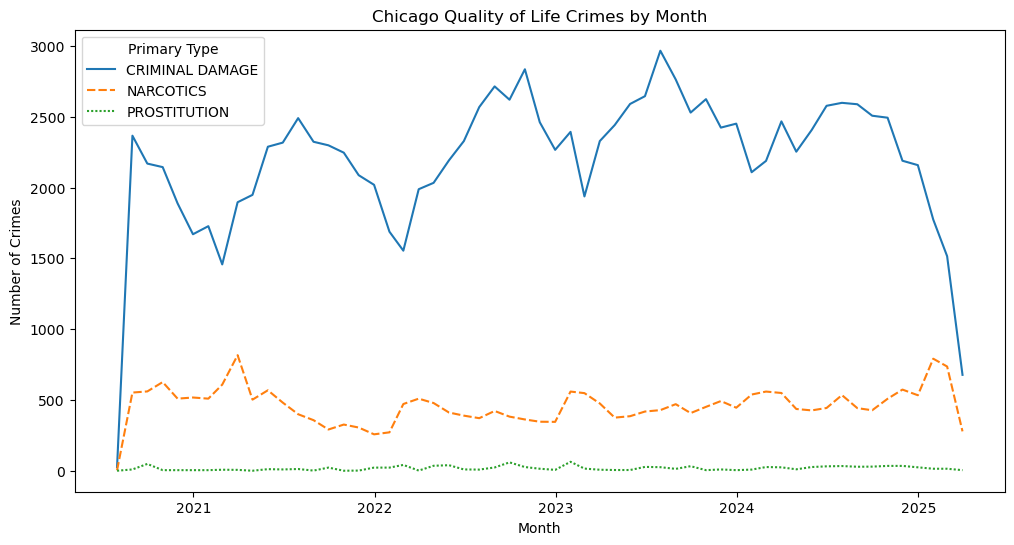

In [13]:
# Classify CRIMINAL DAMAGE, NARCOTICS, PROSTITUTION as 'quality of life crimes'
q_of_life_crimes = df[df['primary_type'].isin(['CRIMINAL DAMAGE', 'NARCOTICS', 'PROSTITUTION'])]

# calcaulte the number of quality of life crimes for each month
monthly_q_of_life_crime_counts = q_of_life_crimes.groupby([pd.Grouper(key='date', freq='M'), 'primary_type']).size().unstack(fill_value=0)

print(monthly_q_of_life_crime_counts)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_q_of_life_crime_counts)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Chicago Quality of Life Crimes by Month')
plt.legend(title='Primary Type')
plt.show()

In [14]:
# get crime location counts
crime_locations = df.groupby('location_description').size()
crime_locations = crime_locations.sort_values(ascending=False).rename('Total') #.reset_index()

# print crime location stats
print(crime_locations.head())
print("...\nTotal Locations: {:,}".format(crime_locations.size))

location_description
STREET                                    299795
APARTMENT                                 212663
RESIDENCE                                 147875
SIDEWALK                                   58300
PARKING LOT / GARAGE (NON RESIDENTIAL)     38362
Name: Total, dtype: int64
...
Total Locations: 150


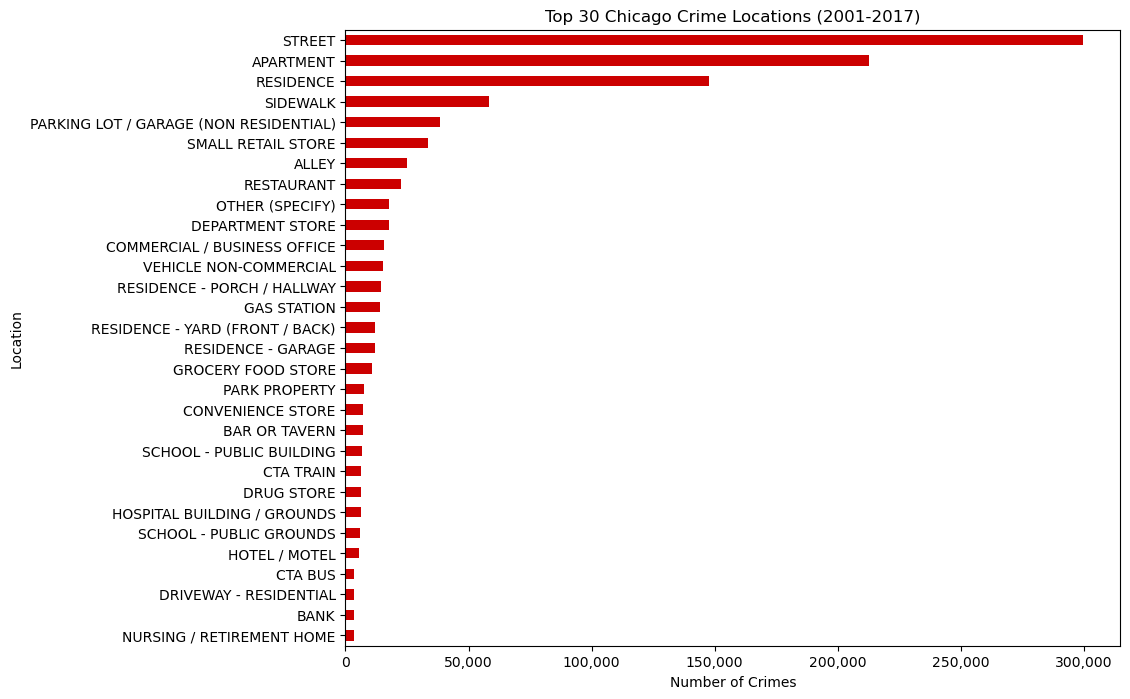

In [15]:
# plot top 30 crime locations
crime_locations[:30].sort_values(ascending=True)\
.plot(kind='barh', figsize=(10,8), color='#cc0000')
plt.title('Top 30 Chicago Crime Locations (2001-2017)')
plt.xlabel('Number of Crimes')
plt.ylabel('Location')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [16]:
df.groupby('community_area').size().rename('Total')

community_area
1.0     18521
2.0     16729
3.0     18150
4.0      9103
5.0      5966
        ...  
73.0    13423
74.0     2477
75.0     8538
76.0     7786
77.0    13845
Name: Total, Length: 77, dtype: int64

In [17]:
# get crime geo data
crime_geo = df[['primary_type', 'latitude', 'longitude']].dropna()

# get homicides
homicides = crime_geo[(crime_geo['primary_type']=='HOMICIDE')]
homicides['latitude'] = pd.to_numeric(homicides['latitude'], errors='coerce')
homicides['longitude'] = pd.to_numeric(homicides['longitude'], errors='coerce')
# print(homicides.head())

# get kidnappings
kidnappings = crime_geo[(crime_geo['primary_type']=='KIDNAPPING')]
kidnappings['latitude'] = pd.to_numeric(kidnappings['latitude'], errors='coerce')
kidnappings['longitude'] = pd.to_numeric(kidnappings['longitude'], errors='coerce')
# print(kidnappings.head())

# get criminal sexual assaults
sexual_assaults = crime_geo[(crime_geo['primary_type']=='CRIMINAL SEXUAL ASSAULT')]
sexual_assaults['latitude'] = pd.to_numeric(sexual_assaults['latitude'], errors='coerce')
sexual_assaults['longitude'] = pd.to_numeric(sexual_assaults['longitude'], errors='coerce')
# print(sexual_assaults.head())

# get thefts
thefts = crime_geo[(crime_geo['primary_type']=='THEFT')]
thefts['latitude'] = pd.to_numeric(thefts['latitude'], errors='coerce')
thefts['longitude'] = pd.to_numeric(thefts['longitude'], errors='coerce')
# print(thefts.head())


/var/folders/gv/4cnh8blj2mgcj1tbxqms_3yw0000gn/T/ipykernel_21279/3117670987.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicides['latitude'] = pd.to_numeric(homicides['latitude'], errors='coerce')
/var/folders/gv/4cnh8blj2mgcj1tbxqms_3yw0000gn/T/ipykernel_21279/3117670987.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicides['longitude'] = pd.to_numeric(homicides['longitude'], errors='coerce')
/var/folders/gv/4cnh8blj2mgcj1tbxqms_3yw0000gn/T/ipykernel_21279/3117670987.py:12: SettingWithCopy

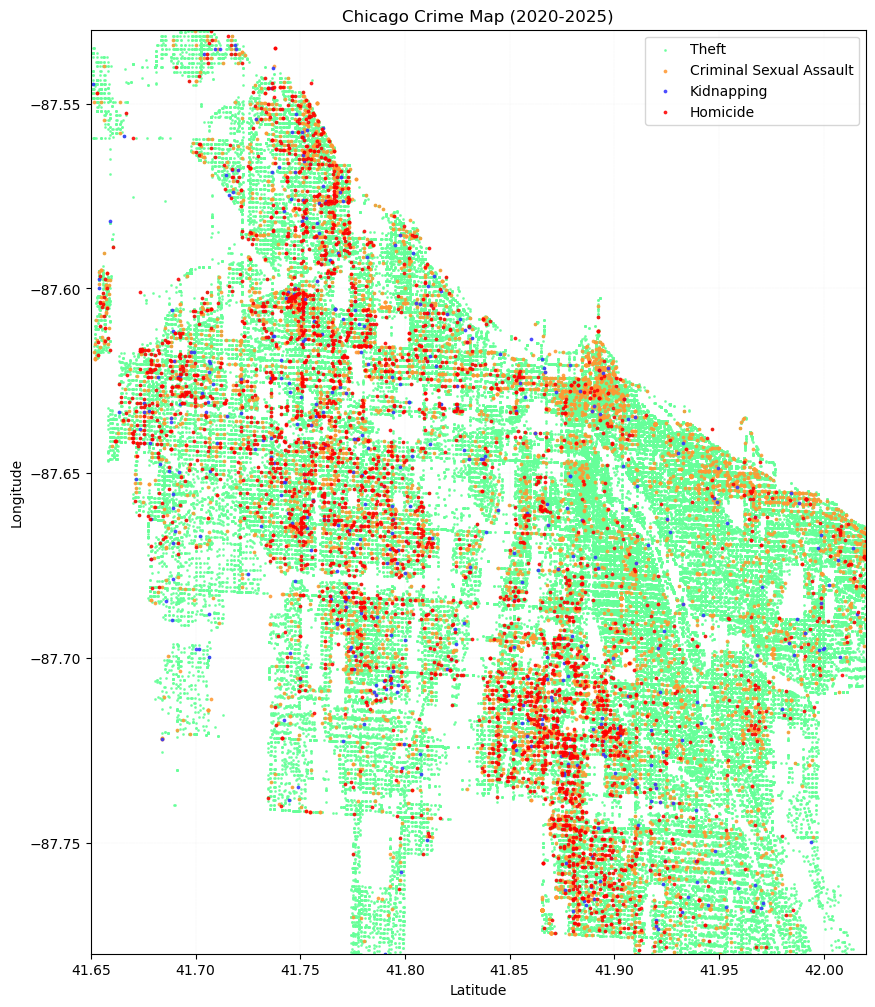

In [20]:
# create scatter map plot
fig,ax= plt.subplots(1, 1, figsize=(10,12))
plt.xlim(41.65, 42.02) # (minLat, maxLat)
plt.ylim(-87.78, -87.53) # (minLong, maxLong)
#ax.set_facecolor('black')

# plot thefts, homicides, kidnappings and sexual assaults
ax.scatter(thefts['latitude'], thefts['longitude'],\
                            s=1, alpha=0.8, color='#66ff99', label='Theft')
ax.scatter(sexual_assaults['latitude'], sexual_assaults['longitude'],\
                            s=3, alpha=0.8, color='#ff9933', label='Criminal Sexual Assault')
ax.scatter(kidnappings['latitude'], kidnappings['longitude'],\
                            s=3, alpha=0.8, color='#3333ff', label='Kidnapping')
ax.scatter(homicides['latitude'], homicides['longitude'],\
                            s=3, alpha=0.8, color='#ff0000', label='Homicide')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Chicago Crime Map (2020-2025)')
plt.legend(loc='upper right', frameon=True)
plt.grid(linestyle = '--', linewidth = 0.05)
plt.show()